## BarkNet CZ Tree species classification using CNN Model

### Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras import datasets, layers, models
import sklearn
from sklearn.metrics import accuracy_score
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense
from tensorflow.keras.layers import MaxPooling2D, Activation, Flatten, Dropout
from keras import optimizers
from tensorflow.keras import optimizers
from keras.models import Sequential
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils import class_weight

### Loading dataset and labels

##### Change the image size based on experiments. Example, (90, 90) or (150, 150) or (250, 250).

In [2]:



import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# set image path and categories
data_path = "D:/BarkNet Europe 1.0/"
categories = os.listdir(data_path)

# initialize lists for features and labels
data = []
labels = []

# load images and extract features
for category in categories:
    category_path = os.path.join(data_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
#         print("Loaded image shape:", img.shape)
        img = cv2.resize(img, (150, 150))
        img_cnn = img_to_array(img)
        
        data.append(img_cnn)
        
        labels.append(category)

# Convert lists to numpy arrays
data = np.array(data, dtype=np.float32)

labels = np.array(labels)

# Print shapes of the arrays to verify
print("data:", data.shape)

print("Labels shape:", labels.shape)


data: (27000, 150, 150, 3)
Labels shape: (27000,)


### Training-Testing split

In [3]:


## split dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data, labels,
test_size=0.3)



In [4]:


# Convert string labels to integer labels
label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

# Convert integer labels to categorical labels
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


### Define CNN Model

#### Add or remove layers based on requirements

In [5]:
model_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(150,150,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
        layers.MaxPool2D((2,2)),
    
#         layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
#         layers.MaxPool2D((2,2)),
#         layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dropout(0.3),
    
        layers.Dense(64, activation='relu'),
        layers.Dense(8, activation='softmax')           
])

### Compiling the model

In [6]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

### Fit the model



In [7]:

history=model_cnn.fit(x_train, y_train, epochs=20, batch_size=64, 
          validation_split = 0.3,
          verbose=1,)

Epoch 1/20
207/207 [==============================] - 517s 2s/step - loss: 2.7364 - acc: 0.2465 - val_loss: 2.0730 - val_acc: 0.2039
Epoch 2/20
207/207 [==============================] - 495s 2s/step - loss: 1.8736 - acc: 0.2912 - val_loss: 1.6141 - val_acc: 0.4268
Epoch 3/20
207/207 [==============================] - 386s 2s/step - loss: 1.4439 - acc: 0.5153 - val_loss: 1.2646 - val_acc: 0.6185
Epoch 4/20
207/207 [==============================] - 396s 2s/step - loss: 0.9789 - acc: 0.6869 - val_loss: 0.7731 - val_acc: 0.7439
Epoch 5/20
207/207 [==============================] - 425s 2s/step - loss: 0.6487 - acc: 0.7868 - val_loss: 0.7416 - val_acc: 0.7316
Epoch 6/20
207/207 [==============================] - 418s 2s/step - loss: 0.4881 - acc: 0.8325 - val_loss: 0.5706 - val_acc: 0.8016
Epoch 7/20
207/207 [==============================] - 424s 2s/step - loss: 0.4004 - acc: 0.8630 - val_loss: 0.5759 - val_acc: 0.8046
Epoch 8/20
207/207 [==============================] - 444s 2s/step - 

### Model evaluation on Training set

In [8]:
traninCC=model_cnn.evaluate(x_train,y_train)
traninCC

591/591 [==============================] - 179s 303ms/step - loss: 0.1570 - acc: 0.9576


[0.15695388615131378, 0.9575661420822144]

### Evaluation on Testing set

In [9]:
model_cnn.evaluate(x_test,y_test)

254/254 [==============================] - 82s 322ms/step - loss: 0.3924 - acc: 0.8964


[0.3924448490142822, 0.8964197635650635]

### Prediction

In [10]:
Y_pred = model_cnn.predict([x_test])
y_pred=np.argmax(Y_pred, axis=1)
loss= model_cnn.evaluate( x_test,y_test)
print(loss)
print("Baseline Error: %.2f%%" % (100-loss[1]*100))

254/254 [==============================] - 82s 321ms/step - loss: 0.3924 - acc: 0.8964
[0.3924448490142822, 0.8964197635650635]
Baseline Error: 10.36%


In [11]:
Y_test=np.argmax(y_test, axis=1)
accuracy_score(Y_test, np.argmax(Y_pred, axis=1))

0.8964197530864197

### Confusion Matrix

([<matplotlib.axis.YTick at 0x2d473348220>,
 [Text(0, 0.5, 'Alba'),
  Text(0, 1.5, 'Pendula'),
  Text(0, 2.5, ' Betulus'),
  Text(0, 3.5, 'Sylvatica'),
  Text(0, 4.5, 'Decidua'),
  Text(0, 5.5, 'Sylvestris'),
  Text(0, 6.5, 'Petreae'),
  Text(0, 7.5, 'Spruce')])

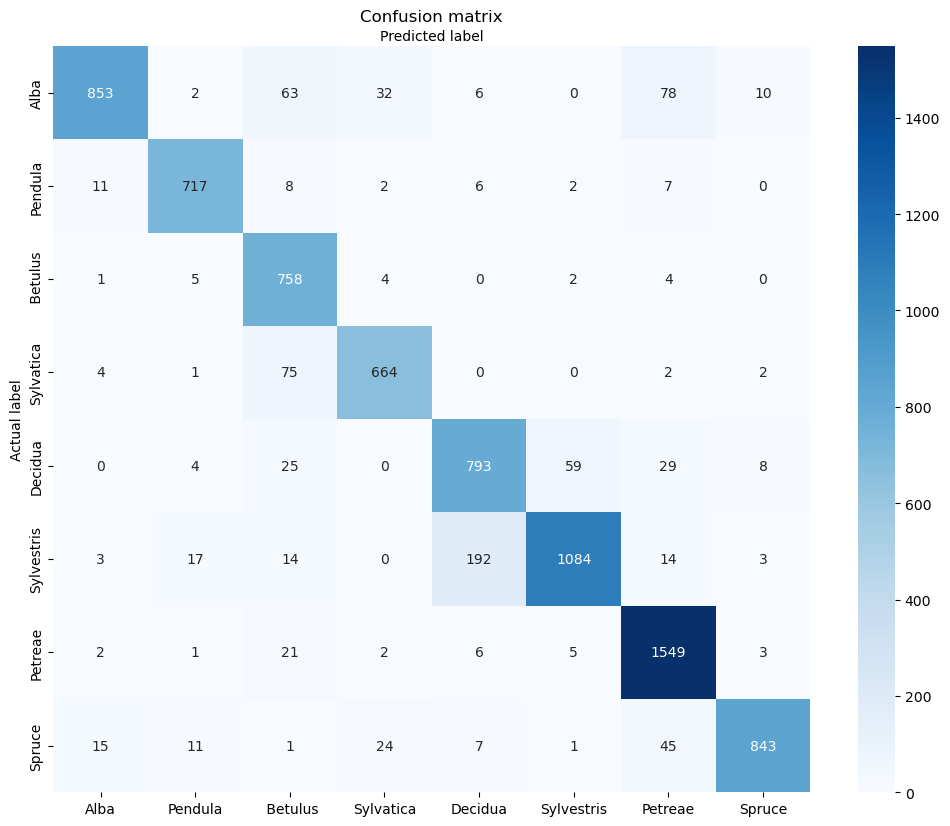

In [12]:
matrix= confusion_matrix(Y_test, y_pred)

class_names=['Alba', 'Pendula', ' Betulus',
'Sylvatica', 'Decidua', 'Sylvestris', 'Petreae', 'Spruce'] # name  of classes
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label') 
plt.ylabel('Actual label')
tick_marks = [0.5, 1.5,2.5,3.5, 4.5, 5.5, 6.5, 7.5]
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

### Classification Report

In [13]:

print (classification_report(Y_test, np.argmax(Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1044
           1       0.95      0.95      0.95       753
           2       0.79      0.98      0.87       774
           3       0.91      0.89      0.90       748
           4       0.79      0.86      0.82       918
           5       0.94      0.82      0.87      1327
           6       0.90      0.97      0.93      1589
           7       0.97      0.89      0.93       947

    accuracy                           0.90      8100
   macro avg       0.90      0.90      0.90      8100
weighted avg       0.90      0.90      0.90      8100



### Train-Validation : Loss graphs

<Axes: >

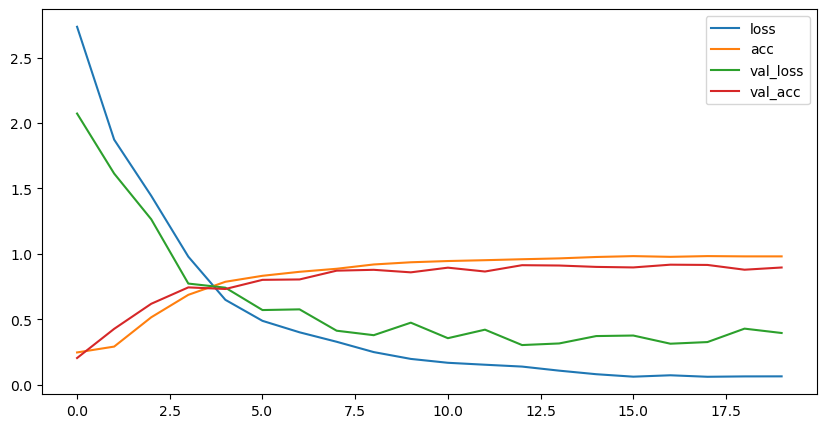

In [14]:
# Getting the model training history
model_history = history.history

# Model history into a pandas dataframe
loss_acc_df = pd.DataFrame(model_history)

# Plotting the loss and accuracy 

loss_acc_df.plot(figsize=(10,5))

### Train-validation accuracy graphs

In [15]:
acc = model_history['acc']
val_acc = model_history['val_acc']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history.epoch

# function to plot accuracy 

def plot_acc(acc, val_acc, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

def plot_loss(loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)
  plt.figure()

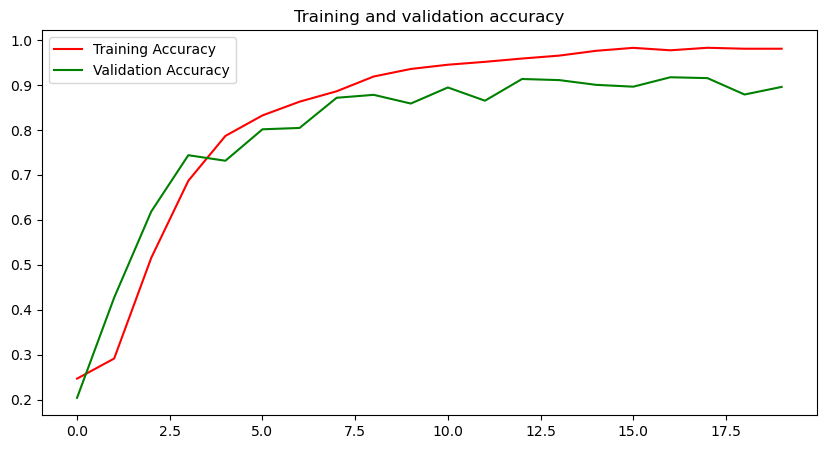

<Figure size 640x480 with 0 Axes>

In [16]:
#Plotting acc

plot_acc(acc, val_acc, epochs)

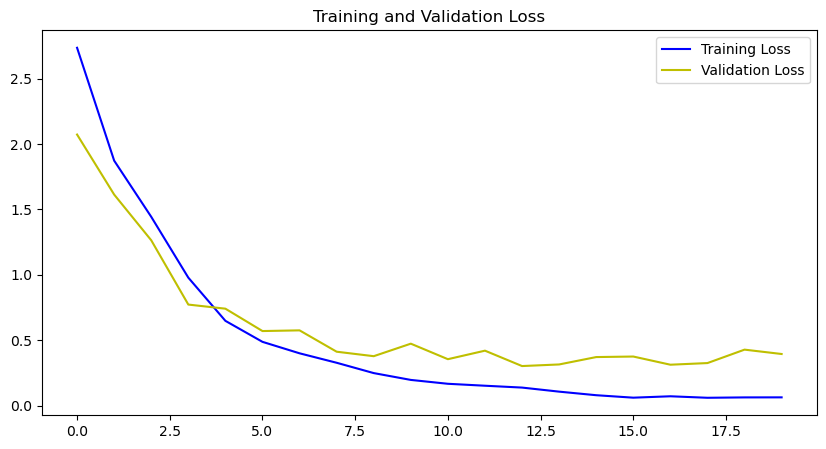

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot loss 

plot_loss(loss, val_loss, epochs)

#### Saving and Loading the Model for Prediction

In [ ]:
# Saving a model

model_cnn.save('Model cnn copybark.h5')

In [ ]:
# Loading a saved model
from keras.models import load_model

# load_cnn = load_model('Model cnn copy5.h5')

In [ ]:
# load_cnn.summary()